In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
population = pd.read_csv('../BDD/population.csv')
energy = pd.read_csv('../BDD/energy.csv')
gdp = pd.read_csv('../BDD/world-gdp-over-the-last-two-millennia.csv', sep=';')
gpec = pd.read_csv('../BDD/global-energy-substitution.csv')
total = gpec['Wind (TWh; substituted energy)']+gpec['Oil (TWh; substituted energy)']+gpec['Nuclear (TWh; substituted energy)']+ gpec['Hydropower (TWh; substituted energy)']+gpec['Traditional bimass (TWh; substituted energy)']+gpec['Other renewables (TWh; substituted energy)']+gpec['Biofuels (TWh; substituted energy)']+gpec['Solar (TWh; substituted energy)']+ gpec['Coal (TWh; substituted energy)']+gpec['Gas (TWh; substituted energy)']
gpec['Total (TWh)']=total
population[population.Code == 'OWID_WRL']
energy[energy.Code == 'OWID_WRL']
gdp[gdp.Code == 'OWID_WRL']

int = pd.merge(gdp[gdp.Code == 'OWID_WRL'],gpec[gpec.Code == 'OWID_WRL'], on=['Year'] )
complete_data = pd.merge(int, gdp, on=['Year'])
complete_data.head()
int.head()

,Entity_x,Code_x,Year,World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017)),Population,Entity_y,Code_y,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy),Total (TWh)
0,World,OWID_WRL,1820,1.202361e+12,989818304,World,OWID_WRL,0,0,0,0,6111,0,0,0,153,0,6264
1,World,OWID_WRL,1870,1.923917e+12,1262682112,World,OWID_WRL,0,6,0,0,6944,0,0,0,1642,0,8592
2,World,OWID_WRL,1900,3.418754e+12,1650000000,World,OWID_WRL,0,181,0,44,6111,0,0,0,5728,64,12128
3,World,OWID_WRL,1940,7.806369e+12,2300000000,World,OWID_WRL,0,2653,0,504,7222,0,0,0,11586,875,22840
4,World,OWID_WRL,1950,9.251063e+12,2536431104,World,OWID_WRL,0,5444,0,877,7500,0,0,0,12603,2092,28516


In [2]:
def derivee(t, y) :
    der = []
    n=len(t)-2
    for i in range(2,n) : 
        der.append((y[i+2]-y[i-2])/(t[i+2]-t[i-2]))
    return t[2:n], np.array(der)

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
year=int['Year']

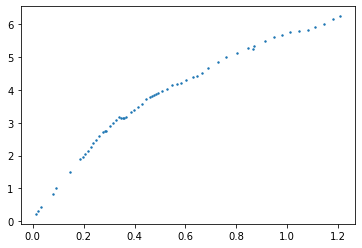

In [3]:
plt.scatter(gdp, energy, s=2)

C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'Loss = 2.7616242242520155')

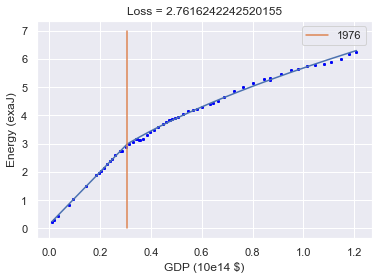

In [4]:
import regressions as reg

def piecewise_regression(xdata, ydata, step = 2) :
    n = len(xdata)

    r1, y1 = reg.linReg(xdata[0:step+1], ydata[0:step+1])
    linLoss = reg.linLoss(xdata[0:step], ydata[0:step], r1, y1)

    r2, y2= reg.expReg(xdata[step:], ydata[step:])
    expLoss = reg.expLoss(xdata[step:], ydata[step:], r2, y2)

    loss = linLoss+expLoss
    lim = step

    for i in range (step, n, step) :
        rlin, ylin = reg.linReg(xdata[0:i], ydata[0:i])
        rexp, yexp = reg.expReg(xdata[i:], ydata[i:])
        linLoss = reg.linLoss(xdata[0:i], ydata[0:i], rlin, ylin)
        expLoss = reg.expLoss(xdata[i:], ydata[i:], rexp, yexp)
        if expLoss+linLoss < loss : 
            loss = expLoss+linLoss
            r1, y1 = rlin, ylin
            r2, y2 = rexp, yexp
            lim = i
    return lim, (r1, y1), (r2, y2)

piecewise_regression(gdp, energy, 1)
a, xlim, r, y0 = reg.linExpReg(gdp, energy, p0 = (8.54249090463964, gdp[21],0.6 , 2.6345032080655955))

import seaborn as sns 
sns.set_theme()
plt.scatter(gdp, energy, s=4)
xplot = np.linspace(gdp.min(),gdp.max(), 200)
# plt.plot(xplot, reg.lin_exp(xplot,a, xlim, r, y0 ), color='red')
a, xlim, r, y0 = reg.linPowReg(gdp, energy, p0 = (0.0010959084284438464, gdp[5], 4, 1))
plt.scatter(gdp, energy, s=4, color='blue')
xplot = np.linspace(gdp.min(),gdp.max(), 200)
plt.plot(xplot, reg.lin_pow(xplot, a, xlim, r, y0 ))
plt.ylabel("Energy (exaJ)")
plt.xlabel("GDP (10e14 $)")
ypred= reg.lin_pow(gdp, a, xlim, r, y0 )
loss = reg.l2_loss(ypred, energy)
dist = np.array([abs(gdp[i]-xlim) for i in range(len(gdp))])
plt.plot([xlim]*15, np.linspace(0,7,15), label = str(year[dist.argmin()]))
plt.legend()
plt.title('Loss = '+str(loss))

In [5]:
a, xlim, r, y0 

(9.289362129335744, 0.30726966390378224, 0.5445642627963901, 5.682514161047432)

Text(0.5, 1.0, 'Loss = 2.065304449060564')

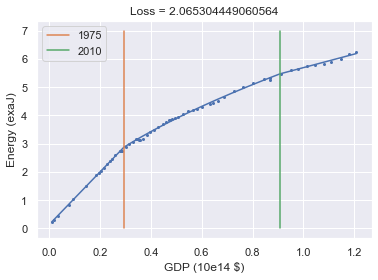

In [6]:
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']

a,y0,r,m, x1, x2 = reg.linPowLin(gdp, energy, p0= (9.289362129335744,  5.682514161047432,0.5445642627963901 , 0.1,0.30726966390378224, 1.1))
plt.scatter(gdp, energy, s= 4)
dist1 = np.array([abs(gdp[i]-x1) for i in range(len(gdp))])
dist2 = np.array([abs(gdp[i]-x2) for i in range(len(gdp))])
plt.plot(xplot, reg.lin_pow_lin(xplot,a,y0,r,m, x1, x2 ) )
plt.plot([x1]*15, np.linspace(0,7,15), label = str(year[dist1.argmin()]))
plt.plot([x2]*15, np.linspace(0,7,15), label = str(year[dist2.argmin()]))
plt.legend()
ypred = reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )
loss = reg.l2_loss(energy, ypred)
plt.ylabel("Energy (exaJ)")
plt.xlabel("GDP (10e14 $)")
plt.title('Loss = '+str(loss))

In [7]:
pop = int['Population']

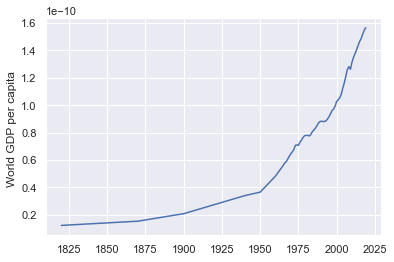

In [8]:
plt.ylabel("World GDP per capita ")
plt.plot(time, gdp/pop)

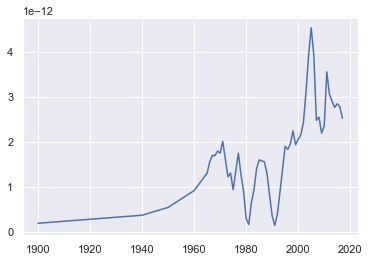

In [9]:
year, der = derivee(time, gdp/pop)
plt.plot(year, der )

In [10]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**5
y0, r, a, m, t1, t2 =reg.expLinLin(year, gdp/pop, p0 =(0.00973, 2*10**-5, 0.0012, 0.0014,1950, 1990 ))

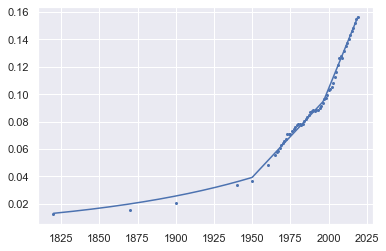

In [11]:
xplot = np.linspace(year.min(), year.max(), 200)
plt.scatter(year, gdp/pop, s=4)
plt.plot(xplot, reg.exp_lin_lin(xplot,y0, r, a, m, t1, t2))

In [12]:
a, m

(0.0011952677933799649, 0.0027414715784530846)

In [13]:
def f(x, b=3, c=5) :
    return b/(c-x)
f = np.vectorize(f)

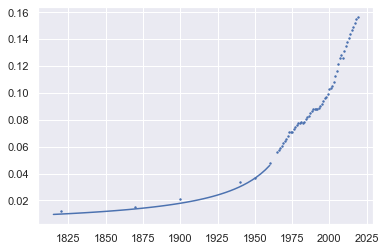

In [14]:
x = np.linspace(1815, 1960)
plt.scatter(time, gdp/pop, s= 2)
plt.plot(x, f(x, c=1998, b=0.175*10**1))

In [22]:
reg.hypLinLin(time, gdp/pop, p0 =(1.75, 1998, 9.3, 2.4, 1960, 1990) )

(2.2205760191332584,
 2005.274020880947,
 8.087235030753197,
 0.0019979851241595146,
 1976.2090233679708,
 1976.207311534497)

Text(0.5, 0, 'Year')

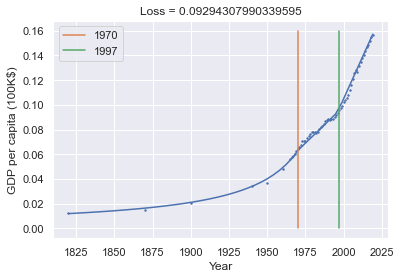

In [53]:
timeplot = np.linspace(time.min(), time.max(), 50)
plt.scatter(time, gdp/pop , s=2)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0027414715784530846,
 1970.2090080602459,
 1996))
ypred= reg.hyp_lin_lin(time, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0028414715784530846,
 1970.2090080602459,
 1997)
loss = reg.l2_loss(gdp/pop, ypred)
plt.title('Loss = '+str(loss))
plt.plot([1970,1970], [0.00, 0.16], label='1970')
plt.plot([1997,1997], [0.00, 0.16], label='1997')
plt.legend()
plt.ylabel('GDP per capita (100K$)')
plt.xlabel('Year')

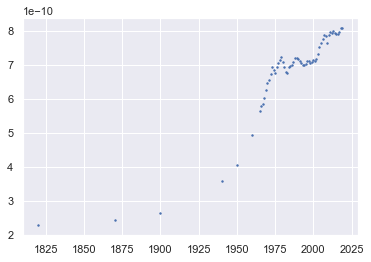

In [56]:
plt.scatter(time,energy/pop, s= 2)

Text(0.5, 0, 'Year')

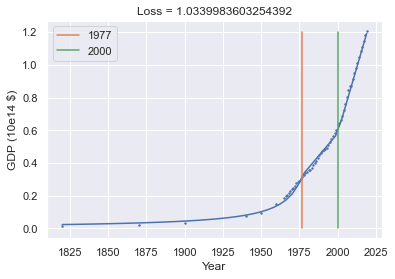

In [97]:
plt.scatter(time, gdp/10**9, s=2)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000))
ypred= reg.hyp_lin_lin(time, 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000)
loss = reg.l2_loss(gdp/10**9, ypred)
plt.title('Loss = '+str(loss))
plt.plot([1977,1977], [0.00, 1.2], label='1977')
plt.plot([2000,2000], [0.00, 1.2], label='2000')
plt.legend()
plt.ylabel('GDP (10e14 $)')
plt.xlabel('Year')

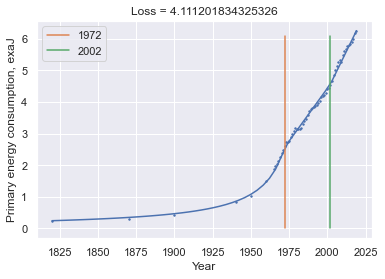

In [150]:
plt.scatter(time, energy, s= 2)
x = np.linspace(1815, 1972)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002))
plt.ylabel('Primary energy consumption, exaJ')
plt.xlabel('Year')
ypred = reg.hyp_lin_lin(time,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002)
loss = reg.l2_loss(ypred, energy)
plt.title("Loss = "+str(loss))
plt.plot([1972,1972], [0.00, 6.1], label='1972')
plt.plot([2002,2002], [0.00, 6.1], label='2002')
plt.legend()



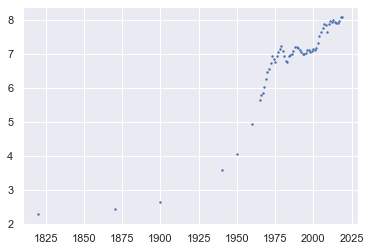

In [153]:
en = energy*10**10
plt.scatter(time, en/pop, s= 2)